# Importing Dependencies

In [127]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [103]:
df = pd.read_csv('car data.csv')
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [104]:
df.shape

(301, 9)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [106]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [107]:
print(df.Fuel_Type.value_counts(),"\n")
print(df.Seller_Type.value_counts(),"\n")
print(df.Transmission.value_counts(),"\n")

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64 

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64 

Manual       261
Automatic     40
Name: Transmission, dtype: int64 



# Replacing column values with binary numbers

In [108]:
df["Fuel_Type"]=df["Fuel_Type"].map({"Petrol":0,"Diesel":1,"CNG":2})
df["Seller_Type"]=df["Seller_Type"].map({'Dealer':0,'Individual':1})
df["Transmission"]=df["Transmission"].map({'Manual':0,'Automatic':1})
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


# Spliting data

In [109]:
x = df.drop(['Car_Name','Selling_Price'],axis=1)
y = df['Selling_Price']

In [110]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=2)
print("Shape of data : ", df.shape)
print("x_train shape : " , x_train.shape)
print("x_test shape  : ", x_test.shape)
print("y_train shape : ", y_train.shape)
print("y_test shape  : ", y_test.shape)

Shape of data :  (301, 9)
x_train shape :  (240, 7)
x_test shape  :  (61, 7)
y_train shape :  (240,)
y_test shape  :  (61,)


# *** LINEAR REGRESSION ***

# Training the Machine

In [111]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

# Prediction on Training Data

In [112]:
pred_train = reg.predict(x_train)
pred_train

array([ 6.78487861e+00,  1.03052148e+00,  4.33053370e+00,  2.19376150e-02,
        3.57946207e+00,  2.79503372e+00,  1.43719894e+00,  4.14889545e-01,
        1.61166418e+00,  1.12839641e+00,  4.32086309e+00,  6.17477452e+00,
        9.29097627e-01,  7.35592155e-01,  6.15378778e+00,  3.42694561e+00,
        2.32984882e+00,  7.50014006e+00,  4.61811711e+00,  4.43437311e+00,
        4.45915634e+00,  2.73352428e+00,  4.44377264e+00,  1.71378422e+00,
        2.49318608e-01,  3.94331375e+00,  1.37445456e+00,  4.61754769e+00,
        1.38595068e+00,  7.35605367e+00,  7.24473016e+00,  6.54331682e+00,
        2.29055849e+00,  2.19058216e+01,  2.19873970e+00,  5.64492151e+00,
        2.82714047e+00,  7.68311323e+00,  5.67039850e+00,  1.00273475e+01,
        1.99828812e+00,  2.37716894e+00,  1.22731322e+00,  2.40303328e+00,
        9.94390646e+00,  2.01662591e+00, -6.42391420e-01,  5.42943934e+00,
        1.14107420e+01, -5.10458803e-03,  1.09479248e+00,  1.61329534e+00,
        5.38687939e+00,  

In [113]:
result_train = pd.DataFrame({
    'actual': y_train,
    'predicted': pred_train
})
result_train

,actual,predicted
235,9.10,6.784879
106,1.35,1.030521
10,2.85,4.330534
152,0.50,0.021938
77,1.50,3.579462
...,...,...
75,3.95,4.713486
22,4.40,5.039586
72,7.45,8.928755
15,7.75,8.678703


# R2 Score

In [114]:
error_score = metrics.r2_score(y_train, pred_train)
print("R squared Error : ", error_score)

R squared Error :  0.8838169193709798


# Visualize the Actual prices and Predicted prices

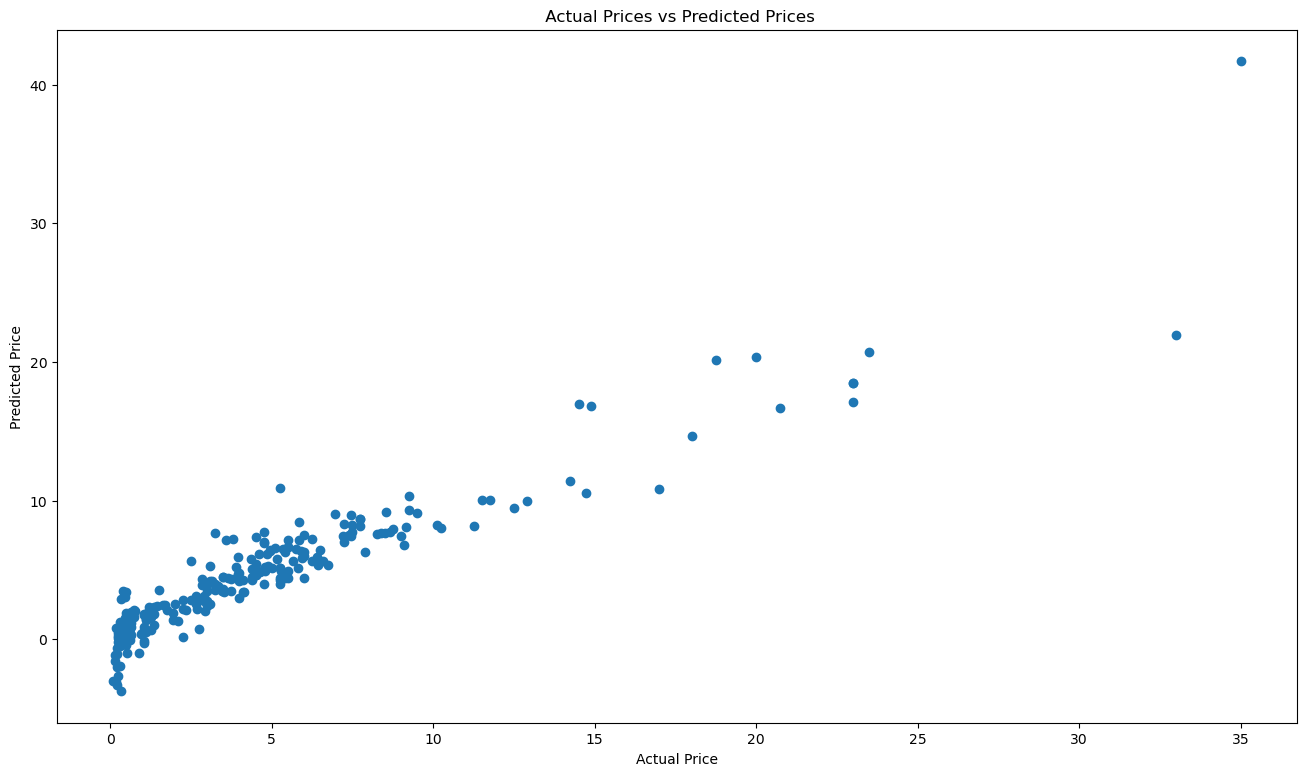

In [115]:
plt.figure(figsize=(16,9))
plt.scatter(y_train, pred_train)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

# Prediction on Testing Data

In [116]:
pred_test = reg.predict(x_test)
pred_test

array([10.39222503,  0.71269634,  4.26367425,  4.89542882,  9.84484784,
        4.22631808,  7.1173891 ,  7.37327394,  0.1592961 ,  5.16712598,
        6.20624893,  6.17414198,  2.11880837,  7.74045843,  1.92235986,
        1.71406658,  2.02899942,  1.8536463 ,  9.35171759,  4.2546458 ,
        1.48996098,  9.14496453,  1.45846216,  9.63402658,  0.82165042,
        8.07898502,  1.53763892, -3.19873666,  4.22373915,  2.09526116,
        3.42865389,  3.72427545,  5.58001877,  7.75879392, -1.91563192,
        6.80980082,  8.20694812,  5.81047156,  6.15629896,  6.27493028,
       16.02197751,  2.07455343,  1.04886513, -0.45830577,  6.82090538,
        6.78567581,  0.98725428,  6.83257783, 14.31925066,  3.01359825,
        8.04481951, -0.89441322,  8.99139759,  1.14814903,  2.1191082 ,
       -0.82919712,  0.68456956, 10.02743111, -0.46773344, -2.43254957,
       10.0831552 ])

In [117]:
result_test = pd.DataFrame({
    'actual': y_test,
    'predicted': pred_test
})
result_test

,actual,predicted
99,9.65,10.392225
161,0.45,0.712696
89,4.75,4.263674
30,3.10,4.895429
232,11.45,9.844848
...,...,...
172,0.40,0.684570
94,4.00,10.027431
160,0.45,-0.467733
199,0.12,-2.432550


# R2 Score

In [118]:
error_score = metrics.r2_score(y_test, pred_test)
print("R squared Error : ", error_score)

R squared Error :  0.8401532365378047


# Visualize the Actual prices and Predicted prices

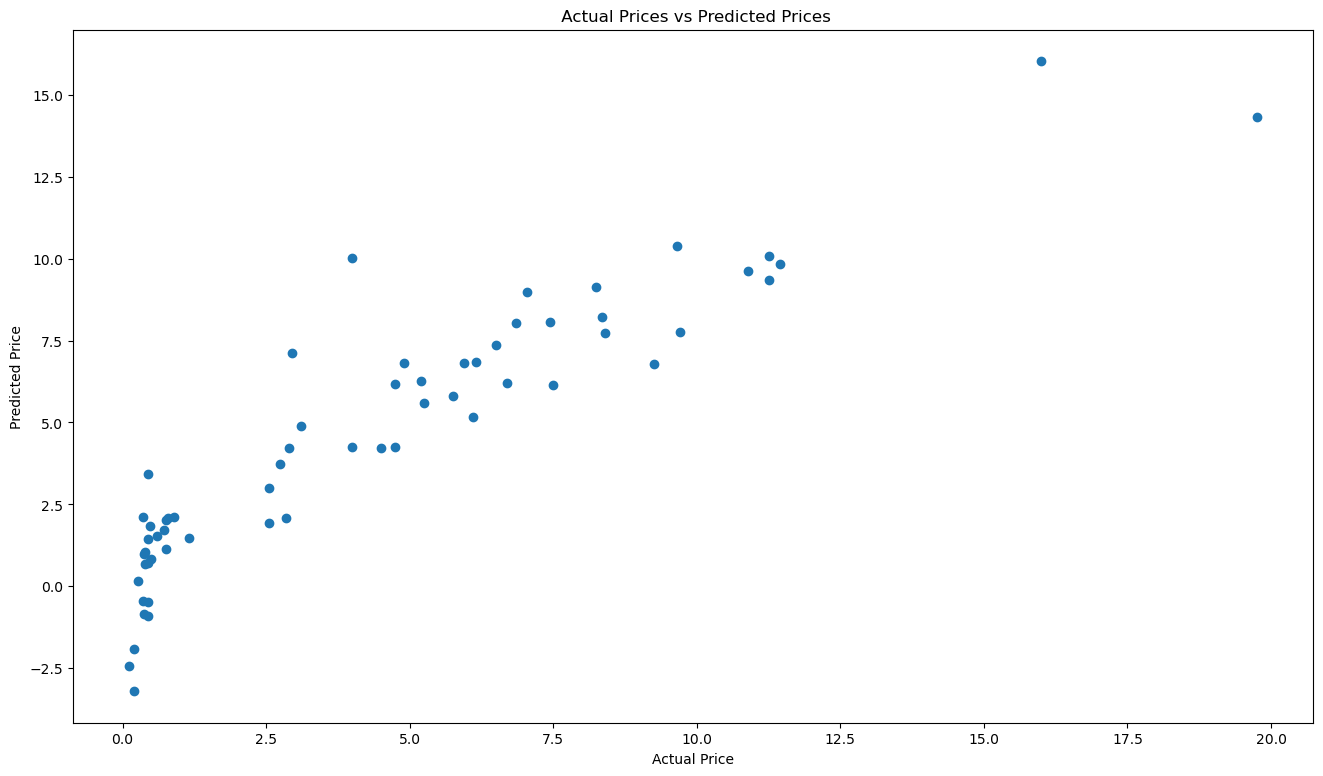

In [100]:
plt.figure(figsize=(16,9))
plt.scatter(y_test, pred_test)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

# *** LASSO REGRESSION ***

# Training the Machine

In [119]:
reg2 = Lasso()
reg2.fit(x_train, y_train)

Lasso()

# Prediction on Testing data

In [121]:
pred_test = reg2.predict(x_test)
pred_test

array([ 9.84567382,  1.41978996,  4.33000433,  3.17455558,  8.92053425,
        4.27617308,  3.7331185 ,  5.65469631,  0.9067815 ,  5.24312003,
        6.45060323,  4.39580233,  1.28891382,  8.24160548,  2.00848206,
        2.30994514,  2.5492099 ,  2.34681358,  7.97733531,  4.18658601,
        2.31777374,  7.86684049,  2.01868131,  8.55068741,  1.53941124,
        6.48280905,  2.1138961 , -1.18968392,  4.00416509,  2.18458499,
        2.4093372 ,  3.56273297,  5.58698712,  8.26139501, -0.83259354,
        5.27147158,  6.48649531,  5.72043366,  6.39669211,  4.79182476,
       15.51840214,  2.59837644,  1.67424249,  0.45725311,  5.16817508,
        6.85817855,  1.61450208,  5.29605485, 13.86828069,  2.87644681,
        6.44593415,  0.08044801,  9.97507828,  1.79190966,  2.64946731,
        0.0470775 ,  1.38245113, 10.10098365,  0.44332429, -1.30063353,
        8.95788022])

In [122]:
result_test = pd.DataFrame({
    'actual': y_test,
    'predicted': pred_test
})
result_test

,actual,predicted
99,9.65,9.845674
161,0.45,1.419790
89,4.75,4.330004
30,3.10,3.174556
232,11.45,8.920534
...,...,...
172,0.40,1.382451
94,4.00,10.100984
160,0.45,0.443324
199,0.12,-1.300634


# R2 Score

In [123]:
error_score = metrics.r2_score(y_test, pred_test)
print("R squared Error : ", error_score)

R squared Error :  0.8497457570738542


# Visualize the Actual prices and Predicted prices

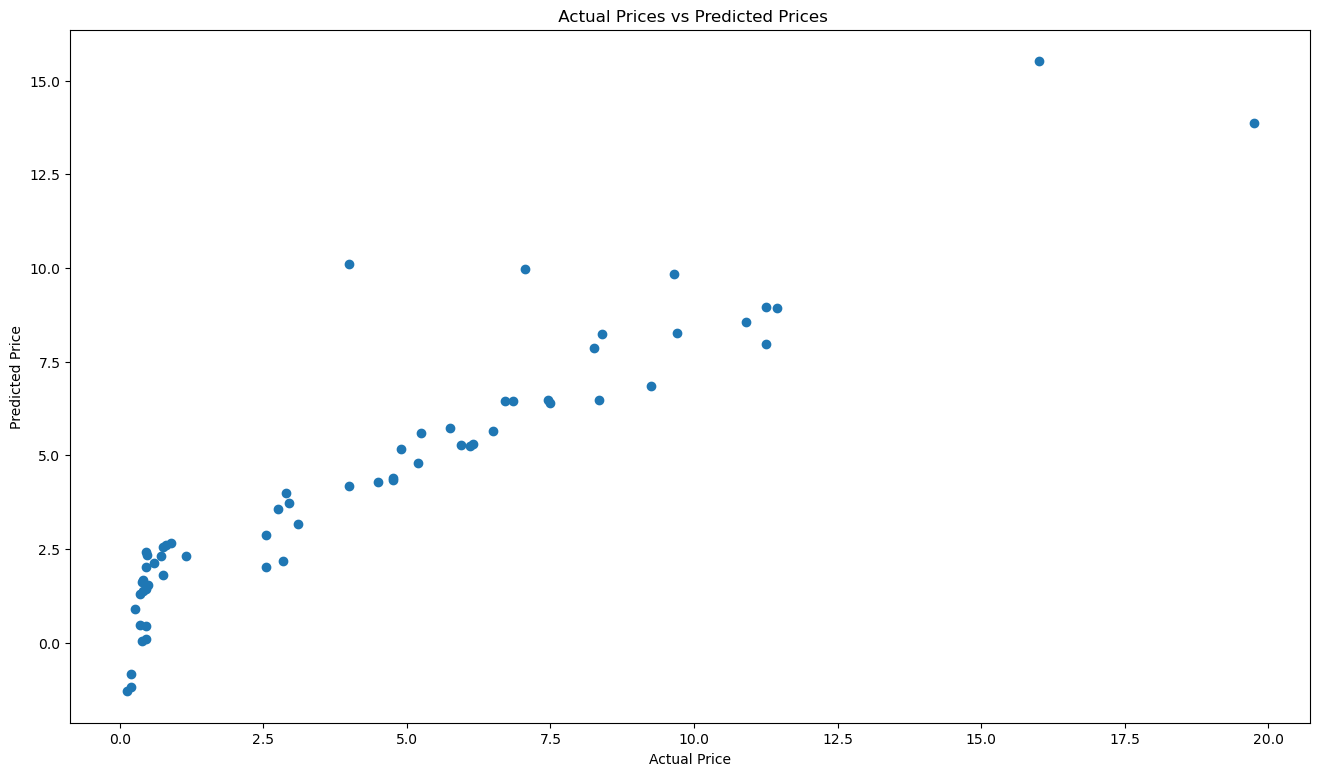

In [124]:
plt.figure(figsize=(16,9))
plt.scatter(y_test, pred_test)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

# UNIVARIATE LINEAR REGRESSION

<Axes: >

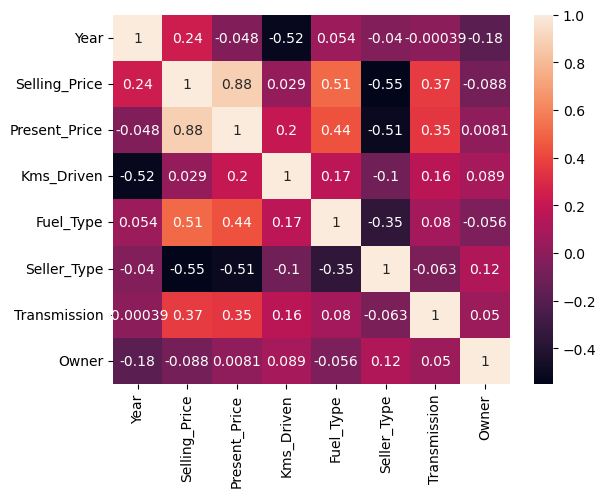

In [153]:
# CORRELATION MATRIX
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True)

# from the correlation matrix we come to know that the selling price of a car depends the most on the present price of the car.
# hence, we will perfoem univariate linear regression using the present_price feature

In [140]:
x = df[['Present_Price']]
y = df['Selling_Price']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=2)
print("Shape of data : ", df.shape)
print("x_train shape : " , x_train.shape)
print("x_test shape  : ", x_test.shape)
print("y_train shape : ", y_train.shape)
print("y_test shape  : ", y_test.shape)

Shape of data :  (301, 9)
x_train shape :  (240, 1)
x_test shape  :  (61, 1)
y_train shape :  (240,)
y_test shape  :  (61,)


In [141]:
reg3 = LinearRegression()
reg3.fit(x_train, y_train)

LinearRegression()

In [146]:
pred_uni = reg3.predict(x_test)
pred_uni

array([11.17041946,  1.16826435,  4.19276437,  3.79520623,  8.28557448,
        4.009276  ,  4.6922605 ,  5.13569073,  0.98681473,  4.6769698 ,
        5.84415973,  4.28960546,  1.01229923,  7.67904346,  3.00518684,
        1.2314659 ,  1.1906907 ,  1.01229923,  7.67904346,  3.70346204,
        1.97051629,  7.88291944,  1.02249303,  7.67904346,  1.1957876 ,
        6.0378419 ,  1.15501241,  1.12952791,  3.00518684,  2.86247366,
        1.00720233,  3.00518684,  4.62090391,  7.67904346,  1.14838644,
        5.53834577,  5.53834577,  4.38134964,  5.84415973,  5.53834577,
       16.34886911,  1.1906907 ,  1.02249303,  1.28243489,  5.29879151,
        5.53834577,  1.11423721,  5.53834577, 12.54658226,  2.77582637,
        6.0378419 ,  1.2314659 , 10.23259   ,  1.16520621,  1.2314659 ,
        1.14838644,  1.07346202, 12.35799699,  1.2314659 ,  1.04288063,
        8.94817138])

In [147]:
result_uni = pd.DataFrame({
    'actual': y_test,
    'predicted': pred_uni
})
result_uni

,actual,predicted
99,9.65,11.170419
161,0.45,1.168264
89,4.75,4.192764
30,3.10,3.795206
232,11.45,8.285574
...,...,...
172,0.40,1.073462
94,4.00,12.357997
160,0.45,1.231466
199,0.12,1.042881


In [148]:
error_score = metrics.r2_score(y_test, pred_uni)
print("R squared Error : ", error_score)

R squared Error :  0.7961414549988879


# Predicting new data entry

In [152]:
n = [[4.586]]
pred = reg3.predict(n)
pred

C:\Users\thite\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.08469847])